<a href="https://colab.research.google.com/gist/fahmij8/969ad08b8e18afbf2241746e47c7ebad/dicoding-rps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paper Rock Scissors Classifier
### By Fahmi Jabbar (rootmawar77@gmail.com)
---
**Disclaimer :** Any code below is done by purposed to complete *Dicoding* Submission and made 100% by myself  

In [0]:
#@title Import important modules { vertical-output: true }
!pip install split-folders tqdm colored
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile
import split_folders
import colored

from google.colab import files
from colored import stylize
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Versi Tensorflow : ", tf.__version__)

     |████████████████████████████████| 61kB 2.4MB/s 
  Created wheel for colored: filename=colored-1.4.2-cp36-none-any.whl size=14003 sha256=d10a10dc94ecf85080afc4fd79b4bdd2aa0984c6aaa7ee0ffdca31a2eac2671e
  Stored in directory: /root/.cache/pip/wheels/ec/10/5e/d17d5ef644e1051a753bd98f3796789ec39bc3337cd36637f3
Successfully built colored
Versi Tensorflow :  2.2.0-rc3


Using TensorFlow backend.


In [0]:
#@title Import dataset
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-05-04 14:12:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.46MB/s    in 44s     

2020-05-04 14:13:12 (7.07 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# Data Preparation

In [0]:
#@title Unzip File
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
print("Unziping complete!")

#Deleting unused folder, free up some spaces
!rm -rf /tmp/__MACOSX/
!rm -rf /tmp/rockpaperscissors/rps-cv-images
!rm -rf /tmp/rockpaperscissors/README_rpc-cv-images.txt
print("Deleting unused file complete!")

Unziping complete!
Deleting unused file complete!


In [0]:
#@title Split to train, validation, test folder
split_folders.ratio('/tmp/rockpaperscissors/', output="/tmp/rps", seed=1337, ratio=(.8, .19, .01))

#Uncomment this for deleting split folder (if necessary) 
#!rm -rf /tmp/rps 
#Uncomment this for free up some spaces (if necessary) 
#!rm -rf /tmp/rockpaperscissors/
#!rm -rf /tmp/rockpaperscissors.zip

Copying files: 2188 files [00:00, 4412.39 files/s]


In [0]:
#@title Details data { vertical-output: true }
train_rock = len(os.listdir('/tmp/rps/train/rock/'))
train_paper = len(os.listdir('/tmp/rps/train/paper/'))
train_scissor = len(os.listdir('/tmp/rps/train/scissors/'))
val_rock = len(os.listdir('/tmp/rps/val/rock/'))
val_paper = len(os.listdir('/tmp/rps/val/paper/'))
val_scissor = len(os.listdir('/tmp/rps/val/scissors/'))
test_rock = len(os.listdir('/tmp/rps/test/rock/'))
test_paper = len(os.listdir('/tmp/rps/test/paper/'))
test_scissor = len(os.listdir('/tmp/rps/test/scissors/'))
total_train = train_rock + train_paper + train_scissor
total_val = val_rock + val_paper + val_scissor
total_test = test_rock + test_paper + test_scissor

print(stylize("Dataset information", colored.fg("blue")))
print(stylize("===========================================", colored.fg("blue")))
print("Training set = ", total_train," Items")
print("Rock : ", train_rock)
print("Paper : ", train_paper)
print("Scissor : ", train_scissor, "\n")
print("Validation set= ", total_val," Items")
print("Rock : ", val_rock)
print("Paper : ", val_paper)
print("Scissor : ", val_scissor, "\n")
print("Test set = ", total_test," Items  " + stylize("(For testing prediction purpose only)", colored.fg("light_red")))
print("Rock : ", test_rock)
print("Paper : ", test_paper)
print("Scissor : ", test_scissor, "\n")
print("Total Rock = ", train_rock + val_rock + test_rock)
print("Total Paper = ", train_paper + val_paper + test_paper)
print("Total Scissor = ", train_scissor + val_scissor + test_scissor)
print("Total Data = ", total_train + total_val + total_test)

Dataset information
Training set =  1749  Items
Rock :  580
Paper :  569
Scissor :  600 

Validation set=  414  Items
Rock :  137
Paper :  135
Scissor :  142 

Test set =  25  Items  (For testing prediction purpose only)
Rock :  9
Paper :  8
Scissor :  8 

Total Rock =  726
Total Paper =  712
Total Scissor =  750
Total Data =  2188


In [0]:
#@title Image Augmentation

train_dir = "/tmp/rps/train/"
val_dir = "/tmp/rps/val/"

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.2,1.0],
    zoom_range=[0.5,1.0])

validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
#@title Create Model
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=128)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=50)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Found 1749 images belonging to 3 classes.
Found 414 images belonging to 3 classes.


In [0]:
#@title Model Summary
model.summary()

model.compile(
    loss = 'categorical_crossentropy', 
    optimizer= 'adam', 
    metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

# Training Model

In [0]:
#@title Training
history = model.fit(
    train_generator, 
    epochs=20, 
    steps_per_epoch= train_generator.samples / train_generator.batch_size, 
    validation_data = validation_generator, 
    verbose = 1,
    validation_steps= validation_generator.samples / validation_generator.batch_size - 1)

Epoch 1/20
14/13 [==============================] - 47s 3s/step - loss: 1.0727 - accuracy: 0.4019 - val_loss: 0.9290 - val_accuracy: 0.5800
Epoch 2/20
14/13 [==============================] - 46s 3s/step - loss: 0.9564 - accuracy: 0.5043 - val_loss: 0.8153 - val_accuracy: 0.6000
Epoch 3/20
14/13 [==============================] - 46s 3s/step - loss: 0.8641 - accuracy: 0.6026 - val_loss: 0.6141 - val_accuracy: 0.6950
Epoch 4/20
14/13 [==============================] - 46s 3s/step - loss: 0.7602 - accuracy: 0.6627 - val_loss: 0.5602 - val_accuracy: 0.6950
Epoch 5/20
14/13 [==============================] - 50s 4s/step - loss: 0.6745 - accuracy: 0.7364 - val_loss: 0.4738 - val_accuracy: 0.7350
Epoch 6/20
14/13 [==============================] - 46s 3s/step - loss: 0.6011 - accuracy: 0.7530 - val_loss: 0.3783 - val_accuracy: 0.8750
Epoch 7/20
14/13 [==============================] - 46s 3s/step - loss: 0.4129 - accuracy: 0.8548 - val_loss: 0.3444 - val_accuracy: 0.8600
Epoch 8/20
14/13 [==

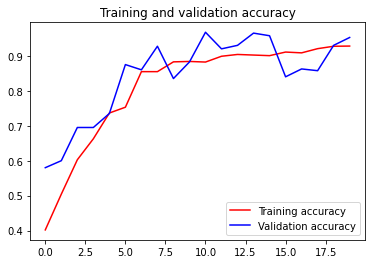

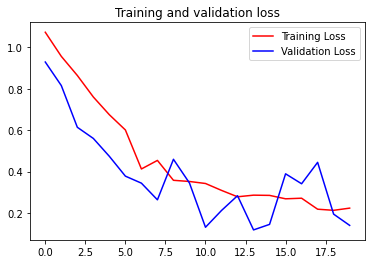

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

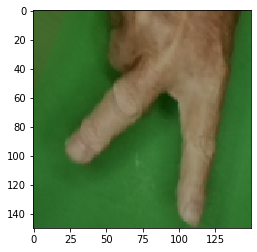

[0. 0. 1.]


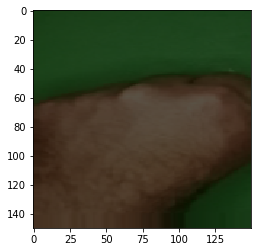

[0. 1. 0.]


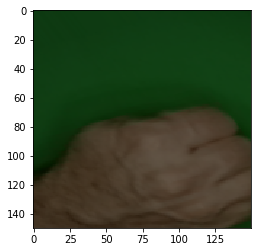

[0. 1. 0.]

1 di awal = paper
1 di tengah = rock
1 di akhir = scissors



In [0]:
#@title Label Explanation { vertical-output: true }

for z in range(3):
  x, y = train_generator.next()
  plt.imshow(x[0], interpolation='nearest')
  plt.show()
  print(y[0])

print('''
1 di awal = paper
1 di tengah = rock
1 di akhir = scissors
''')

In [0]:
#@title Prediction using test-set
#I choose rock
path = os.listdir('/tmp/rps/test/rock')

for gambar in path:
 
  # predicting images
  path = '/tmp/rps/test/rock/' + gambar
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #print(classes)
  if(classes[0][1] >= 0.5):
    print(path + ": " + stylize("Rock ", colored.fg("green")))
  else :
    print(path + ": " + stylize("Not a Rock ", colored.fg("light_red")))

/tmp/rps/test/rock/ELmZ4ELVncvjq7J6.png: Not a Rock 
/tmp/rps/test/rock/ReFXAsLF8NkgNAL4.png: Rock 
/tmp/rps/test/rock/UjbgpVjrwzH0XvuD.png: Rock 
/tmp/rps/test/rock/oGRxysPJ1UwCl0Oh.png: Rock 
/tmp/rps/test/rock/rzRKFMMFob6PQPxk.png: Not a Rock 
/tmp/rps/test/rock/X4UIuiTnzUP68r86.png: Rock 
/tmp/rps/test/rock/kW4W7E0A1Wpo45eL.png: Rock 
/tmp/rps/test/rock/nS9fHg3r4luGv0mF.png: Rock 
/tmp/rps/test/rock/qsa5Kd0lZctgmHvM.png: Rock 


Saving 0Uomd0HvOB33m47I.png to 0Uomd0HvOB33m47I (6).png
Paper probability: 100.0
Rock probability: 0.0
Scissors probability: 0.0


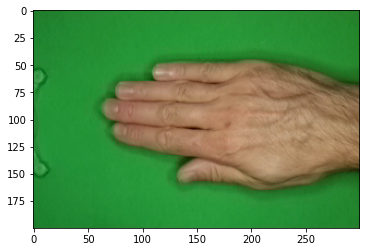

In [0]:
#@title Choose your file! { vertical-output: true }
#Please
uploaded = files.upload()

for gambar in uploaded.keys():
 
  path = gambar
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.imshow(mpimg.imread(path))
  #print(classes)
  paper_predict = classes[0][0] * 100
  rock_predict = classes[0][1] * 100
  scissor_predict = classes[0][2] * 100 
  print("Paper probability: " + stylize(paper_predict, colored.fg("green")))
  print("Rock probability: " + stylize(rock_predict, colored.fg("green")))
  print("Scissors probability: " + stylize(scissor_predict, colored.fg("green")))